In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [4]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf


train = pd.read_csv('data/train_features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_features.csv')
submission = pd.read_csv('data/sample_submission.csv')

X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
y = tf.keras.utils.to_categorical(train_labels['label']) 

In [8]:
embed_dim = 6  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(600, 6))
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(inputs)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(61, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X, y, epochs=300, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/300
40/40 [==============================] - 45s 1s/step - loss: 1.5853 - accuracy: 0.5845 - val_loss: 1.4662 - val_accuracy: 0.6432
Epoch 2/300
40/40 [==============================] - 44s 1s/step - loss: 1.5574 - accuracy: 0.5872 - val_loss: 1.4657 - val_accuracy: 0.6336
Epoch 3/300
40/40 [==============================] - 45s 1s/step - loss: 1.5583 - accuracy: 0.5847 - val_loss: 1.4788 - val_accuracy: 0.6400
Epoch 4/300
40/40 [==============================] - 48s 1s/step - loss: 1.5289 - accuracy: 0.6003 - val_loss: 1.4577 - val_accuracy: 0.6336
Epoch 5/300
40/40 [==============================] - 46s 1s/step - loss: 1.5622 - accuracy: 0.5775 - val_loss: 1.4638 - val_accuracy: 0.6384
Epoch 6/300
40/40 [==============================] - 49s 1s/step - loss: 1.5991 - accuracy: 0.5770 - val_loss: 1.4790 - val_accuracy: 0.6352
Epoch 7/300
40/40 [==============================] - 49s 1s/step - loss: 1.5394 - accuracy: 0.5896 - val_loss: 1.4527 - val_accuracy: 0.6416
Epoch 8/300
4

Epoch 59/300
40/40 [==============================] - 48s 1s/step - loss: 1.4558 - accuracy: 0.6026 - val_loss: 1.4154 - val_accuracy: 0.6352
Epoch 60/300
40/40 [==============================] - 46s 1s/step - loss: 1.4817 - accuracy: 0.6067 - val_loss: 1.4110 - val_accuracy: 0.6448
Epoch 61/300
40/40 [==============================] - 48s 1s/step - loss: 1.4746 - accuracy: 0.6126 - val_loss: 1.3902 - val_accuracy: 0.6496
Epoch 62/300
40/40 [==============================] - 48s 1s/step - loss: 1.4795 - accuracy: 0.6013 - val_loss: 1.4037 - val_accuracy: 0.6432
Epoch 63/300
40/40 [==============================] - 46s 1s/step - loss: 1.5107 - accuracy: 0.5938 - val_loss: 1.4068 - val_accuracy: 0.6320
Epoch 64/300
40/40 [==============================] - 49s 1s/step - loss: 1.5134 - accuracy: 0.5892 - val_loss: 1.4043 - val_accuracy: 0.6480
Epoch 65/300
40/40 [==============================] - 50s 1s/step - loss: 1.5213 - accuracy: 0.5928 - val_loss: 1.3882 - val_accuracy: 0.6384
Epoch 

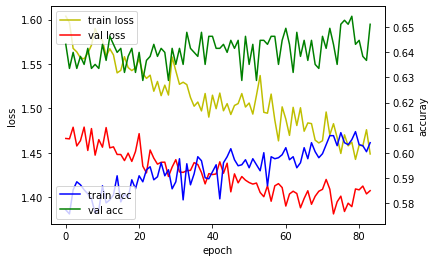

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [13]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + ffn_output)

In [14]:
embed_dim = 6  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(600, 6))
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(inputs)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(20, activation="relu")(x)
outputs = layers.Dense(61, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X, y, epochs=300, batch_size=64,  validation_split=0.2, callbacks = [es])

Epoch 1/300
40/40 [==============================] - 46s 1s/step - loss: 4.1126 - accuracy: 0.0304 - val_loss: 3.8516 - val_accuracy: 0.3728
Epoch 2/300
40/40 [==============================] - 47s 1s/step - loss: 3.6413 - accuracy: 0.4487 - val_loss: 2.9029 - val_accuracy: 0.4976
Epoch 3/300
40/40 [==============================] - 46s 1s/step - loss: 2.8300 - accuracy: 0.4761 - val_loss: 2.7075 - val_accuracy: 0.4976
Epoch 4/300
40/40 [==============================] - 47s 1s/step - loss: 2.7147 - accuracy: 0.4865 - val_loss: 2.6694 - val_accuracy: 0.4976
Epoch 5/300
40/40 [==============================] - 47s 1s/step - loss: 2.6817 - accuracy: 0.4903 - val_loss: 2.6307 - val_accuracy: 0.4976
Epoch 6/300
40/40 [==============================] - 47s 1s/step - loss: 2.6439 - accuracy: 0.4929 - val_loss: 2.6031 - val_accuracy: 0.4976
Epoch 7/300
40/40 [==============================] - 46s 1s/step - loss: 2.5860 - accuracy: 0.4946 - val_loss: 2.5812 - val_accuracy: 0.4976
Epoch 8/300
4

Epoch 59/300
40/40 [==============================] - 52s 1s/step - loss: 1.7050 - accuracy: 0.5724 - val_loss: 1.8291 - val_accuracy: 0.5856
Epoch 60/300
40/40 [==============================] - 51s 1s/step - loss: 1.6840 - accuracy: 0.5741 - val_loss: 1.8344 - val_accuracy: 0.5904
Epoch 61/300
40/40 [==============================] - 57s 1s/step - loss: 1.6568 - accuracy: 0.5913 - val_loss: 1.8478 - val_accuracy: 0.5856
Epoch 62/300
40/40 [==============================] - 54s 1s/step - loss: 1.6647 - accuracy: 0.5762 - val_loss: 1.8376 - val_accuracy: 0.5840
Epoch 63/300
40/40 [==============================] - 55s 1s/step - loss: 1.6359 - accuracy: 0.5897 - val_loss: 1.8150 - val_accuracy: 0.5776
Epoch 64/300
40/40 [==============================] - 67s 2s/step - loss: 1.7001 - accuracy: 0.5750 - val_loss: 1.8394 - val_accuracy: 0.5776
Epoch 65/300
40/40 [==============================] - 82s 2s/step - loss: 1.6225 - accuracy: 0.5944 - val_loss: 1.8121 - val_accuracy: 0.5936
Epoch 

40/40 [==============================] - 50s 1s/step - loss: 1.4509 - accuracy: 0.6134 - val_loss: 1.7106 - val_accuracy: 0.6192
Epoch 117/300
40/40 [==============================] - 46s 1s/step - loss: 1.3882 - accuracy: 0.6385 - val_loss: 1.7039 - val_accuracy: 0.6128
Epoch 118/300
40/40 [==============================] - 47s 1s/step - loss: 1.3866 - accuracy: 0.6220 - val_loss: 1.6998 - val_accuracy: 0.6128
Epoch 119/300
40/40 [==============================] - 48s 1s/step - loss: 1.3605 - accuracy: 0.6265 - val_loss: 1.6922 - val_accuracy: 0.6272
Epoch 120/300
40/40 [==============================] - 47s 1s/step - loss: 1.4461 - accuracy: 0.5998 - val_loss: 1.6865 - val_accuracy: 0.6224
Epoch 121/300
40/40 [==============================] - 44s 1s/step - loss: 1.4338 - accuracy: 0.6129 - val_loss: 1.6891 - val_accuracy: 0.6304
Epoch 122/300
40/40 [==============================] - 42s 1s/step - loss: 1.3456 - accuracy: 0.6387 - val_loss: 1.6849 - val_accuracy: 0.6160
Epoch 123/300

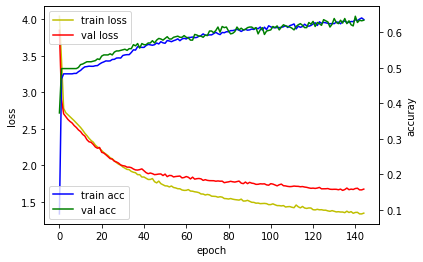

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()